In [1]:
from emulator_utils.pre_process import log_standard, unscale
from emulator_utils.read_data import readpowerspec
from emulator_utils.split import random_holdout
from emulator_utils.surrogates import simple_mlp, train_mlp, save_mlp, load_mlp

In [2]:
import matplotlib.pylab as plt
import numpy as np
from glob import glob

### Reading spectra

Text(0, 0.5, 'Pk')

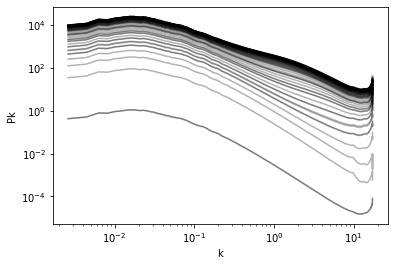

In [21]:
k, _, _, _ = readpowerspec('../test/data/powerspec_LJ/m000p.pk.499')
fnames = glob('../test/data/powerspec_LJ/*')
pk_all = np.array([readpowerspec(f)[1] for f in fnames])


plt.figure(1)
plt.plot(k, pk_all.T, 'k', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Pk')

### Using a pre-processing pipeline.(First log10, then a standardization)

Text(0, 0.5, 'Pk')

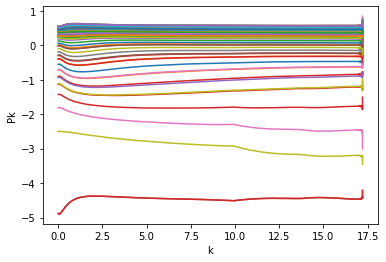

In [4]:
scaled, scaler = log_standard(pk_all)

In [ ]:
params = np.zeros(shape= (scaled.shape[0], 5))
params[:, 0] = np.arange(scaled.shape[0])

### Sample neural network 

In [7]:
pk_train, pk_test, param_train, param_test = random_holdout(scaled, params, split_fraction = 0.2)

In [9]:
### Fixing the network architecture (hidden_dims is flexible)

In [15]:
input_shape = 5
output_shape = pk_train.shape[1]
hidden_dims = np.array([16, 32, 64, 512])

mlp = simple_mlp(input_shape, output_shape, hidden_dims)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                96        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 512)               33280     
                                                                 
 dense_9 (Dense)             (None, 9311)              4776543   
                                                                 
Total params: 4,812,575
Trainable params: 4,812,575
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
### Set-up hyper-parameters

In [17]:
learning_rate = 0.01
decay_rate = 0.1
batch_size = 4
num_epochs = 10

In [18]:
mlp = train_mlp(mlp, 
                param_train, pk_train, param_test, pk_test, 
                learning_rate, decay_rate, batch_size, num_epochs)

1/1 [==============================] - 8s 8s/step - loss: 2.6954 - mean_squared_error: 2.6954
Test Accuracy: 2.695


In [19]:
save_mlp(mlp, '../test/model/trained_mlp')
mlp = load_mlp('../test/model/trained_mlp')

2022-04-17 18:20:35.511710: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../test/model/trained_mlp/assets
Model saved at../test/model/trained_mlp
